# Individual Task №1  - Multivariate Linear Regression

### Dependencies

In [209]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Custom regression methods

In [210]:
def load_datasets(filename, column_list, target_column, n_rows):
        
    df = pd.read_csv(filename, delimiter=',', nrows = n_rows)
    X, y = df[column_list], df[target_column]
    
    return X, y

In [211]:
def split_datasets(X, y, test_size):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    return X_train, X_test, y_train, y_test

In [212]:
def normalize(X):
    
    mean = np.mean(X, axis=0)    
    std = np.std(X, axis=0)    
    X_new = (X - mean) / std 
    
    return X_new, mean, std

In [213]:
def prepare_X(X):
    
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    
    return X_new

In [214]:
def hypothesis(X, theta):
    
    h_thetha = np.dot(X, theta.T)
    
    return h_thetha

In [215]:
def cost_function(X, y, theta):
    
    m = X.shape[0]
    if m == 0:
        return None
    
    J = (1/(2*m)) * np.sum((hypothesis(X, theta)-y)**2, axis=0)
    
    return J

In [216]:
def derivative(X, y, theta):
    
    m = X.shape[0]    
    d_thetha = (1/(np.shape(X)[0]))* np.dot(X.T, hypothesis(X, theta)-y).T 
    
    return d_thetha

In [217]:
def gradient_descent(X, y, theta, alpha, num_iters, epsilon, print_J = True):
    
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J) 
    for i in range(num_iters):        
        theta = theta - alpha*derivative(X, y, theta)
        J = cost_function(X, y, theta)        
        delta = abs(J_history[-1] - J)
        if print_J == True:
            print(J)
        J_history.append(J)
        if delta < epsilon:
            break
            
    return theta, J_history

## Reading initial data

In [233]:
n_rows = 10000
filename  = 'train.csv'
column_list = ['cont1','cont2','cont3','cont4','cont5','cont6','cont7','cont8','cont9','cont10','cont11','cont12','cont13','cont14']
target_column = 'loss'

df = pd.read_csv(filename, delimiter=',', nrows = n_rows)
X, y = df[column_list], df[target_column]
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(10000, 14), y=(10000,)


In [234]:
y

0       2213.18
1       1283.60
2       3005.09
3        939.85
4       2763.85
         ...   
9995    1300.64
9996    2306.61
9997    3082.66
9998    4369.02
9999    3321.12
Name: loss, Length: 10000, dtype: float64

## Data Analysis

### Correlation between parameters

In [187]:
df.corr()

id     cont1     cont2     cont3     cont4     cont5     cont6  \
id      1.000000  0.005809 -0.021908 -0.019031  0.010886  0.014297  0.001158   
cont1   0.005809  1.000000 -0.078474 -0.439601  0.355842 -0.025002  0.750287   
cont2  -0.021908 -0.078474  1.000000  0.455168  0.031077  0.180674  0.019867   
cont3  -0.019031 -0.439601  0.455168  1.000000 -0.340577  0.084777 -0.345748   
cont4   0.010886  0.355842  0.031077 -0.340577  1.000000  0.163997  0.204952   
cont5   0.014297 -0.025002  0.180674  0.084777  0.163997  1.000000 -0.152127   
cont6   0.001158  0.750287  0.019867 -0.345748  0.204952 -0.152127  1.000000   
cont7  -0.017631  0.356044  0.054726  0.111182 -0.133494 -0.247275  0.652161   
cont8  -0.011320  0.370910  0.135816 -0.186128  0.523892  0.006447  0.438628   
cont9   0.002758  0.931687 -0.023968 -0.409402  0.317664 -0.084159  0.790974   
cont10  0.004637  0.798960  0.069036 -0.317445  0.269977 -0.067604  0.880686   
cont11 -0.010959  0.587953  0.122786  0.031854  0.112133 -0.153961  0.768493   
cont12 -0.009404  0.605667  0.113770  0.014479  0.121568 -0.150012  0.779376   
cont13  0.000658  0.523811  0.022656 -0.422851  0.166175 -0.083775  0.809455   
cont14  0.002377  0.075392 -0.046071 -0.030754  0.016937 -0.036084  0.057727   
loss   -0.008497  0.003085  0.134210  0.113133 -0.043416 -0.019348  0.058515   

           cont7     cont8     cont9    cont10    cont11    cont12    cont13  \
id     -0.017631 -0.011320  0.002758  0.004637 -0.010959 -0.009404  0.000658   
cont1   0.356044  0.370910  0.931687  0.798960  0.587953  0.605667  0.523811   
cont2   0.054726  0.135816 -0.023968  0.069036  0.122786  0.113770  0.022656   
cont3   0.111182 -0.186128 -0.409402 -0.317445  0.031854  0.014479 -0.422851   
cont4  -0.133494  0.523892  0.317664  0.269977  0.112133  0.121568  0.166175   
cont5  -0.247275  0.006447 -0.084159 -0.067604 -0.153961 -0.150012 -0.083775   
cont6   0.652161  0.438628  0.790974  0.880686  0.768493  0.779376  0.809455   
cont7   1.000000  0.130055  0.375950  0.489998  0.747985  0.743536  0.272155   
cont8   0.130055  1.000000  0.460082  0.340455  0.303337  0.317553  0.476956   
cont9   0.375950  0.460082  1.000000  0.776587  0.603200  0.621120  0.630870   
cont10  0.489998  0.340455  0.776587  1.000000  0.699696  0.710016  0.699659   
cont11  0.747985  0.303337  0.603200  0.699696  1.000000  0.994716  0.449095   
cont12  0.743536  0.317553  0.621120  0.710016  0.994716  1.000000  0.460879   
cont13  0.272155  0.476956  0.630870  0.699659  0.449095  0.460879  1.000000   
cont14  0.046366  0.044930  0.089392  0.061244  0.064858  0.068433  0.051093   
loss    0.144023  0.036611  0.026821  0.043250  0.124861  0.126413  0.002175   

          cont14      loss  
id      0.002377 -0.008497  
cont1   0.075392  0.003085  
cont2  -0.046071  0.134210  
cont3  -0.030754  0.113133  
cont4   0.016937 -0.043416  
cont5  -0.036084 -0.019348  
cont6   0.057727  0.058515  
cont7   0.046366  0.144023  
cont8   0.044930  0.036611  
cont9   0.089392  0.026821  
cont10  0.061244  0.043250  
cont11  0.064858  0.124861  
cont12  0.068433  0.126413  
cont13  0.051093  0.002175  
cont14  1.000000  0.029564  
loss    0.029564  1.000000

<AxesSubplot:>

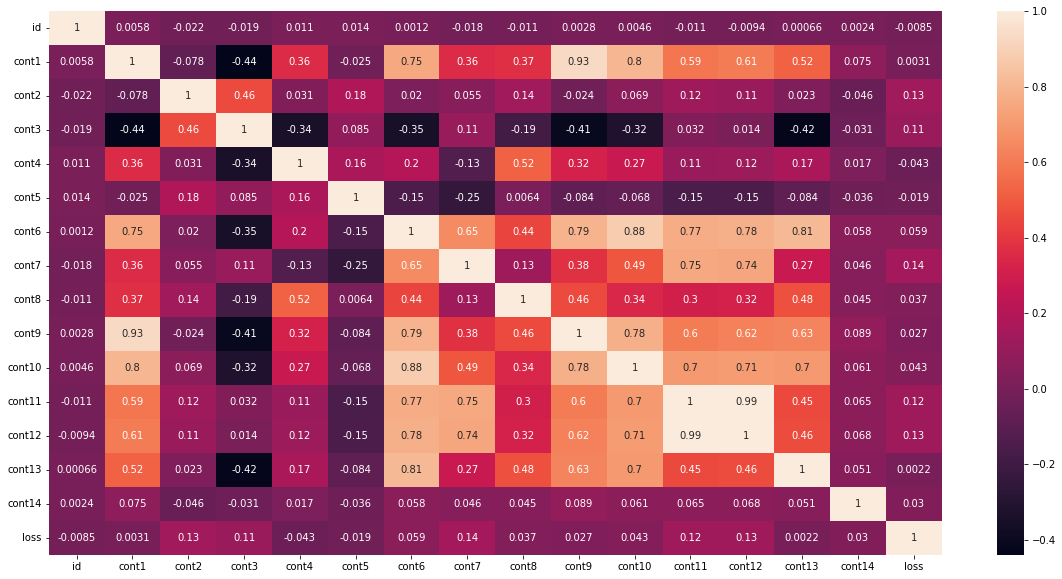

In [188]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(method = 'pearson'), annot = True)

In [189]:
correlation_matrix = df.corr()
correlation_matrix['loss'].sort_values(ascending = True)

cont4    -0.043416
cont5    -0.019348
id       -0.008497
cont13    0.002175
cont1     0.003085
cont9     0.026821
cont14    0.029564
cont8     0.036611
cont10    0.043250
cont6     0.058515
cont3     0.113133
cont11    0.124861
cont12    0.126413
cont2     0.134210
cont7     0.144023
loss      1.000000
Name: loss, dtype: float64

### Pairplots and histograms

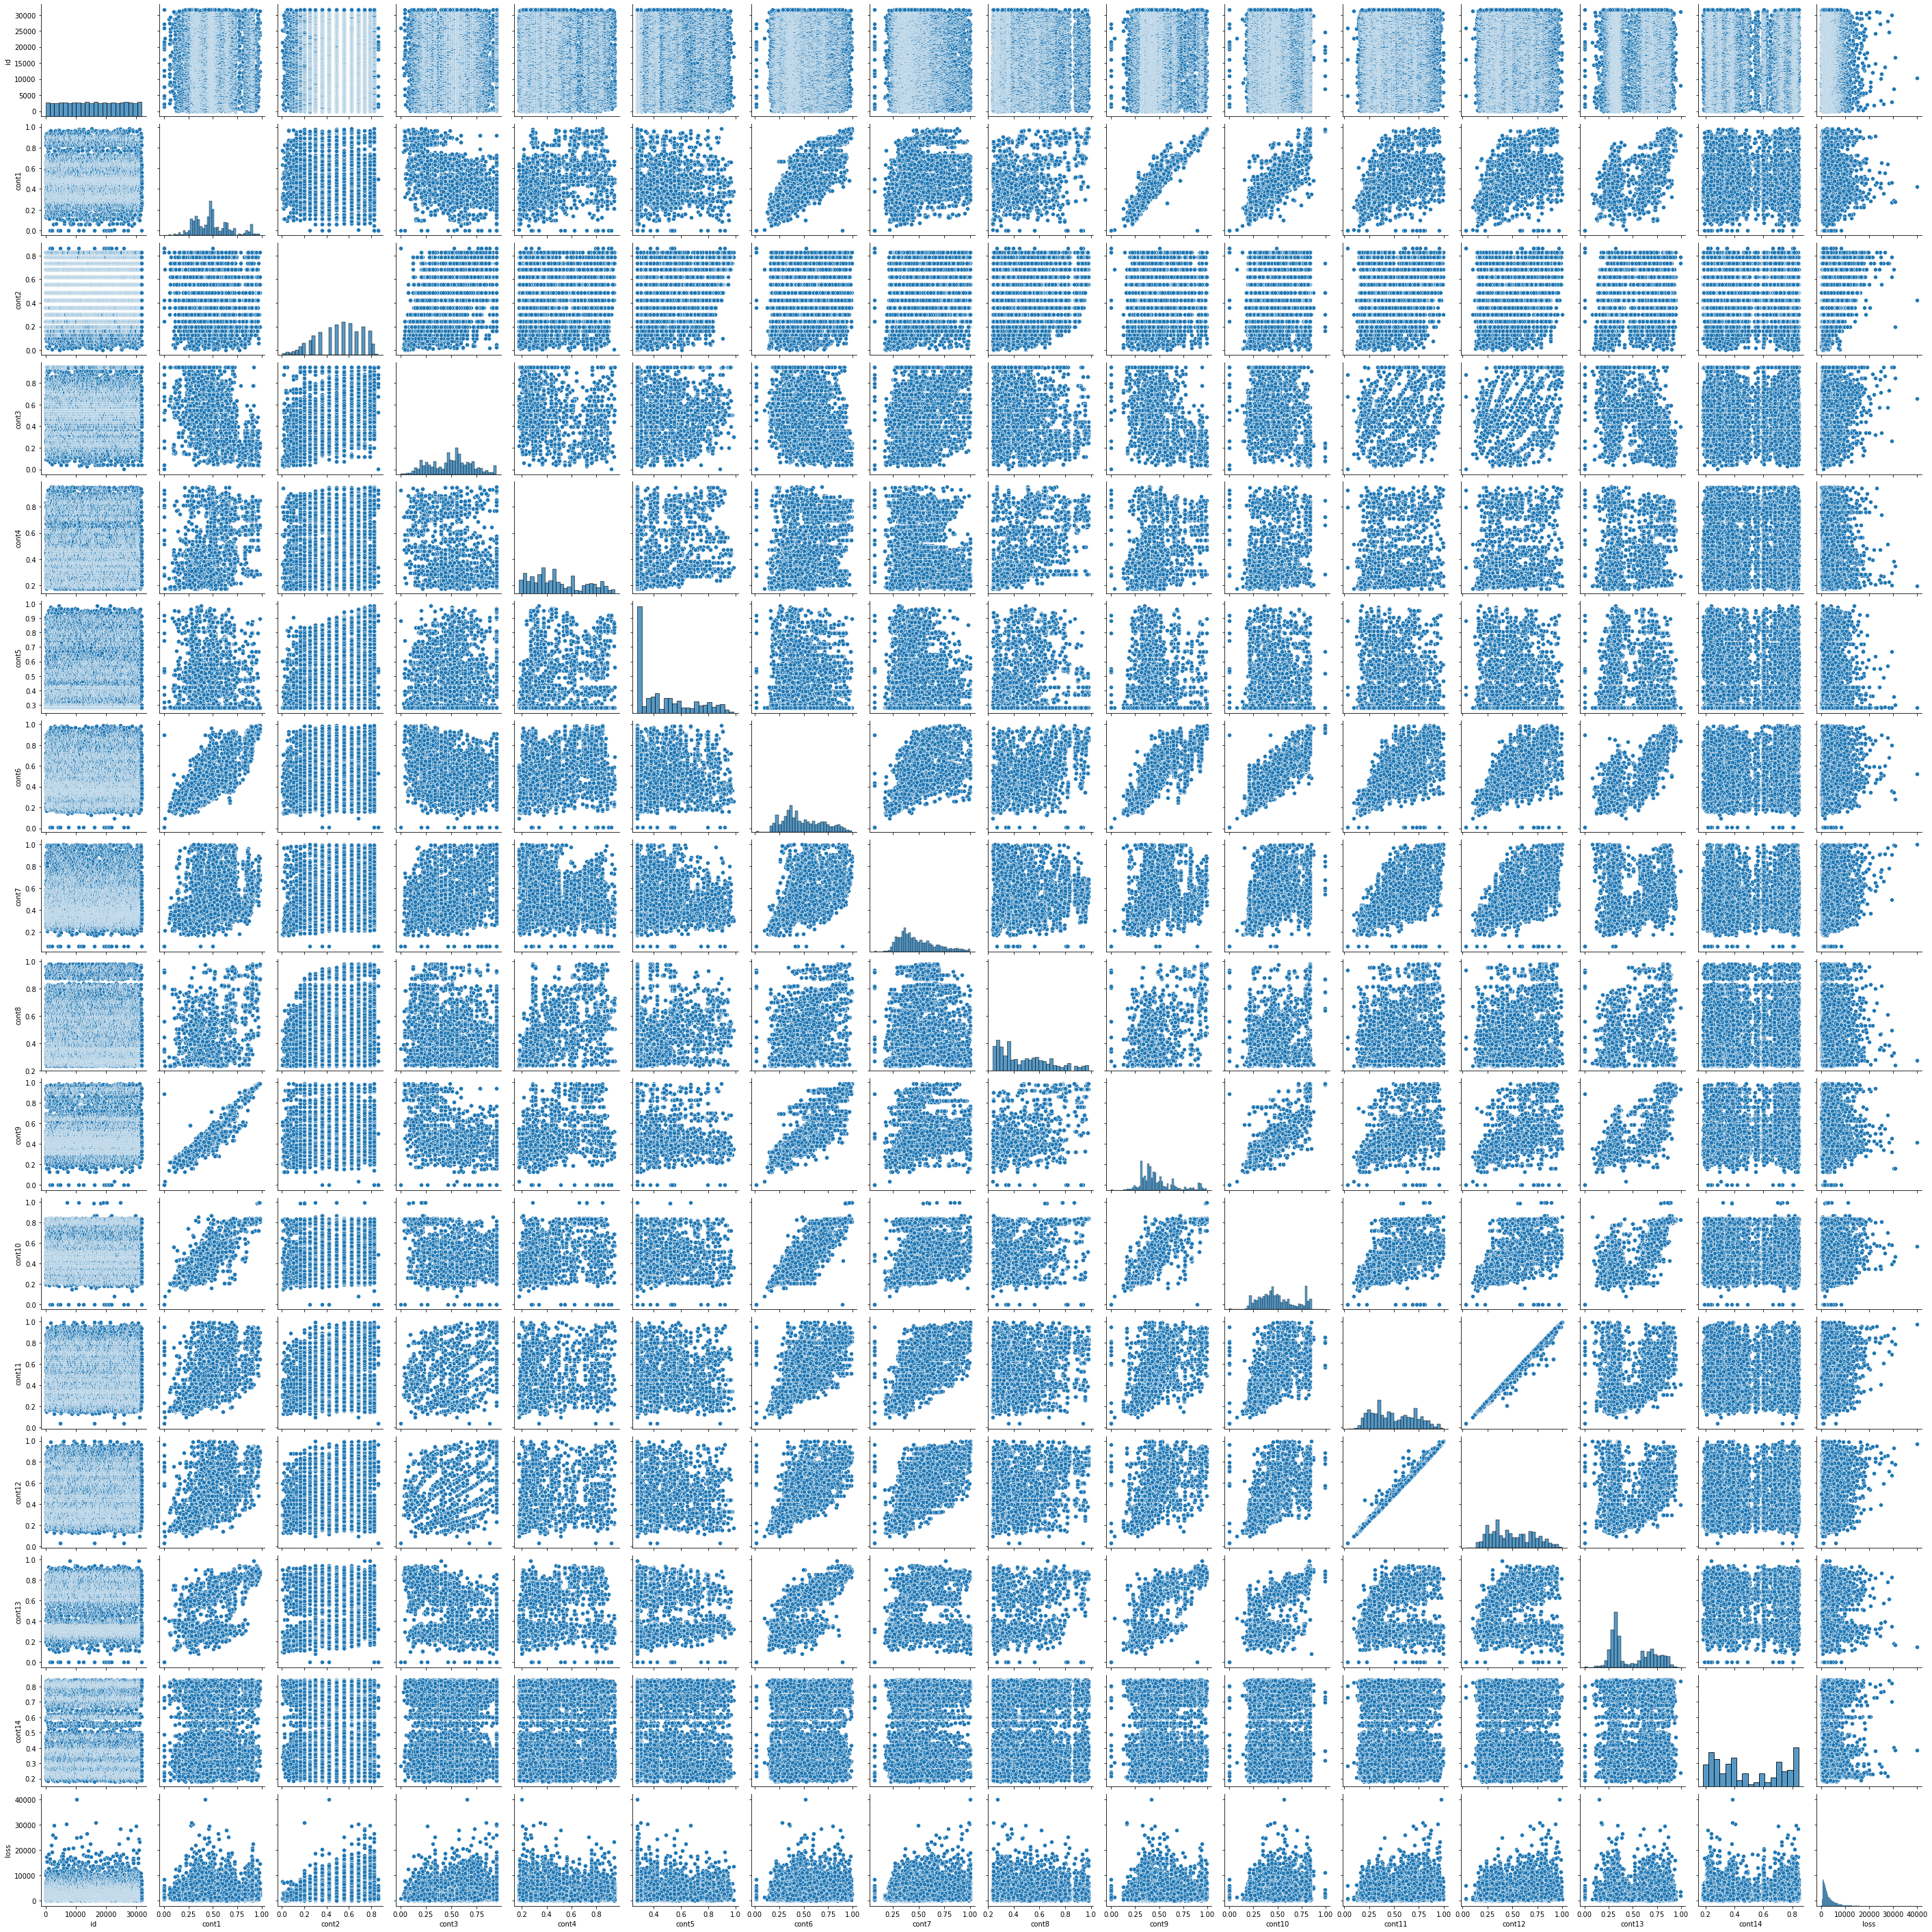

In [190]:
sns.pairplot(df)
plt.show()

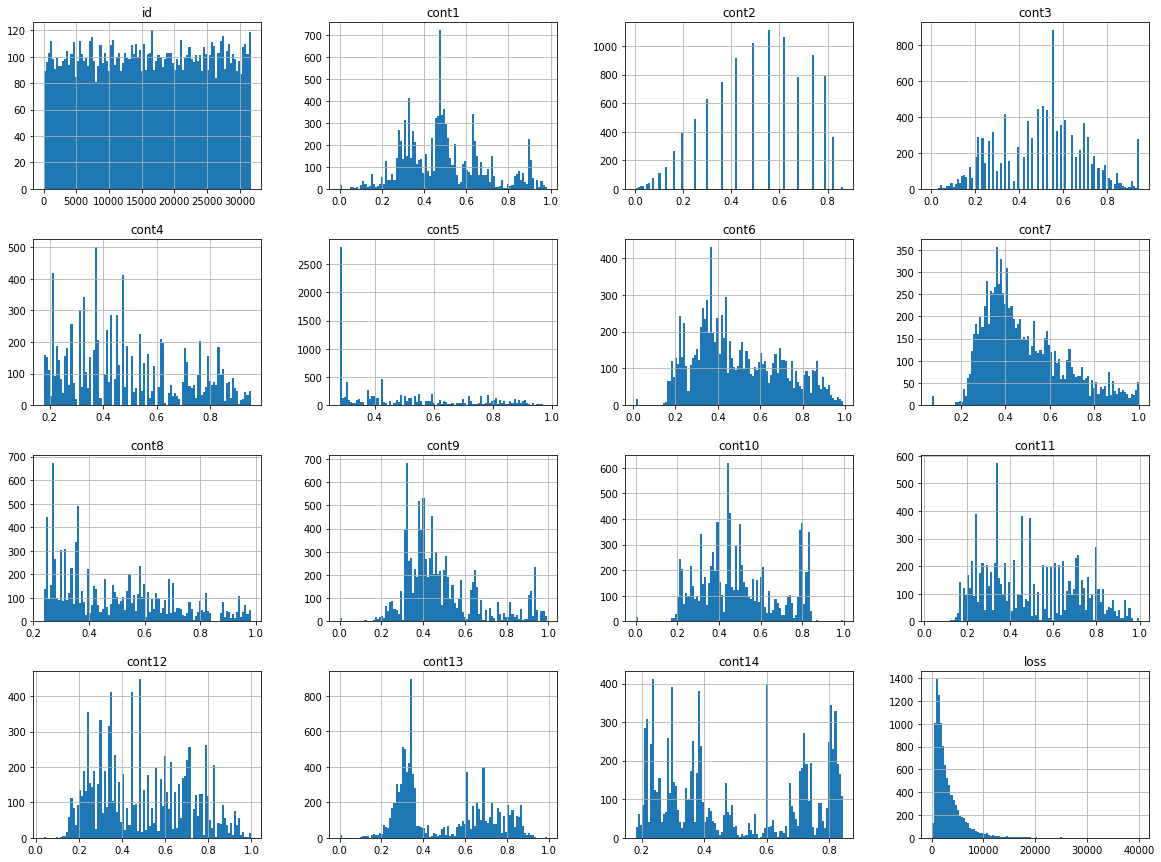

In [191]:
df.hist(bins = 100, figsize = (20,15))
plt.show()

## Main program code

### Reading and and splitting data

In [271]:
final_columns = ['cont2','cont3','cont4', 'cont7','cont11','cont12']
X, y = df[final_columns], df[target_column]
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(10000, 6), y=(10000,)


In [272]:
test_size = 0.02
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Train set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Train set: X=(9800, 6), y=(9800,)
Test set: X=(200, 6), y=(200,)


# Scikit-learn Linear Regression

In [273]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [274]:
test_data_show =  X_test.iloc[:10]
test_values_show = y_test.iloc[:10]

print("\tActual    Predicted")
for actual, predicted in zip(test_values_show.values, regression.predict(test_data_show)):
    print(np.array_str(np.c_[actual, predicted]).replace('[', '   ').replace(']', '   '))

	Actual    Predicted
      5081.76       3178.95822953      
      5599.99       4002.41054292      
      3830.38       2768.25118666      
       914.53       3008.41080436      
      6616.67       3149.41572104      
      2819.4        3006.02862687      
      1015.66       1725.62682638      
      2833.58       4185.74240665      
      1064.46      3722.4400762      
      7330.61      2900.5467466      


### Metrics

In [275]:
MAE_sk = metrics.mean_absolute_error(y_test, regression.predict(X_test))
MSE_sk = metrics.mean_squared_error(y_test, regression.predict(X_test))
RMSE_sk = np.sqrt(metrics.mean_squared_error(y_test, regression.predict(X_test)))
print('MAE_sk', MAE_sk)
print('MSE_sk', MSE_sk)
print('RMSE_sk', RMSE_sk)

MAE_sk 2167.8292374488365
MSE_sk 11549757.007861366
RMSE_sk 3398.493343801245


## Running Custom Linear Regression

### Normalizing and prepearing data

In [276]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.zeros((X.shape[1], ))
print(theta.shape)

(7,)


In [277]:
y = y_train[:]

In [278]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (9800, 7)
y: (9800,)
8717227.935423126


### Setting hyperparameters

In [279]:
alpha = 0.01
num_iters = 50000

In [280]:
eps = 0
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, eps, False)
print(new_theta)

[3045.81710918  316.36480962  136.50750961  -67.562487    273.96463238
 -992.90869203 1108.37605454]


### Analysis of obtained results

In [281]:
X_test_proc = (X_test - mean) / std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err in %' : rel_diff})

print(res)
print("\n")
print(cost_function(X_test_proc, y_test, new_theta))

      y_actual       y_pred    err in %
8002   5081.76  3183.615679   37.352105
536    5599.99  4005.510231   28.472904
6758   3830.38  2769.208560   27.704077
1904    914.53  3008.781315  228.997552
8363   6616.67  3153.772539   52.335955
...        ...          ...         ...
3830   4972.78  2934.930608   40.980083
3288    931.71  3109.549392  233.746487
7652   2898.49  3262.608982   12.562368
965    1518.50  3421.558110  125.324867
6202   2341.97  2915.213785   24.476991

[200 rows x 3 columns]


5773549.22347357


### Metrics

In [282]:
MAE_custom = metrics.mean_absolute_error(y_test, y_test_pred)
MSE_custom = metrics.mean_squared_error(y_test, y_test_pred)
RMSE_custom = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('MAE_custom', MAE_custom)
print('MSE_custom', MSE_custom)
print('RMSE_custom', RMSE_custom)

MAE_custom 2167.3084615782636
MSE_custom 11547098.44694714
RMSE_custom 3398.102183123271


## Comparison between Scikit-learn Regression and Custom Regression algorithm

In [285]:
print ("Comparison between sklearn LinearRegression and custom regression algorithm \n \n")
res_MAE = pd.DataFrame({'MAE_custom' : [MAE_custom], 'MAE_sk' : [MAE_sk], 'difference in %' : [abs(MAE_custom -MAE_sk)/abs(MAE_sk) *100]})
res_MSE = pd.DataFrame({'MSE_custom' : [MSE_custom], 'MSE_sk' : [MSE_sk], 'difference in %' : [abs(MSE_custom - MSE_sk)/abs(MSE_sk)*100]})
res_RMSE = pd.DataFrame({'RMSE_custom' : [RMSE_custom], 'RMSE_sk' : [RMSE_sk], 'difference in %' : [abs(RMSE_custom - RMSE_sk)/abs(RMSE_sk)*100]})
print(res_MAE,'\n')
print(res_MSE,'\n')
print(res_RMSE) 

Comparison between sklearn LinearRegression and custom regression algorithm 
 

    MAE_custom       MAE_sk  difference in %
0  2167.308462  2167.829237         0.024023 

     MSE_custom        MSE_sk  difference in %
0  1.154710e+07  1.154976e+07         0.023018 

   RMSE_custom      RMSE_sk  difference in %
0  3398.102183  3398.493344          0.01151
